**Importing all libraries required in this notebook**

In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading Data**

In [7]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


**Graphically Visualization**

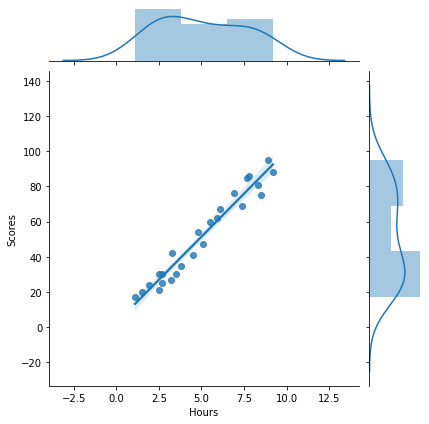

In [9]:
X= df['Hours']  #values of X-axis
Y= df['Scores'] #values of Y-axis
sns.jointplot(X,Y,kind='reg')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Find corelation between the number of hours studied and scored obtained**

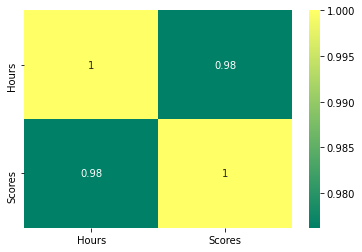

In [10]:
co_rel = df.corr()
sns.heatmap(co_rel,annot=True,cmap='summer')
plt.show()

**Preparing Data**

In [11]:
from sklearn.model_selection import train_test_split  
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [18]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)

[9.77580339]


**Training the Data**

In [20]:
lr.fit(X_train,y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
from sklearn.metrics import r2_score
print("Training Score:",r2_score(y_train,pred_train))
print("Testing Score:",r2_score(y_test,pred_test))

Training Score: 0.9515510725211552
Testing Score: 0.9454906892105354


**Visualization**



for trianing data


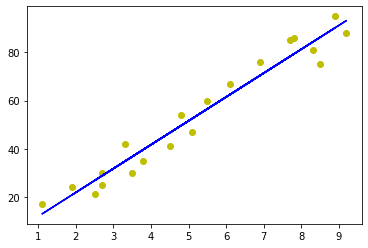

In [25]:
plt.scatter(X_train,y_train, c = 'y')
plt.plot(X_train,pred_train, c= 'b')
plt.show()

for testing data

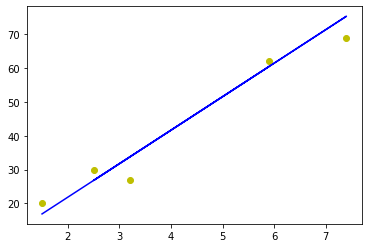

In [26]:
plt.scatter(X_test,y_test,c = 'y')
plt.plot(X_test,pred_test,c = 'b')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_train,pred_train)
print("Mean Squared Error",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error",rmse)
mae = mean_absolute_error(y_train,pred_train)
print("Mean Absolute Error",mae)

Mean Squared Error 30.898182377314544
Root Mean Squared Error 5.558613350226344
Mean Absolute Error 5.186601709180373


In [28]:
print(r2_score(y_train,pred_train))

0.9515510725211552


**Predicting the score if a student study for 9.25 hrs in a day**

In [29]:
test_sample = [9.25]
print("Predicted Score",lr.predict([test_sample]))

Predicted Score [93.69173249]
